In [1]:
%matplotlib inline

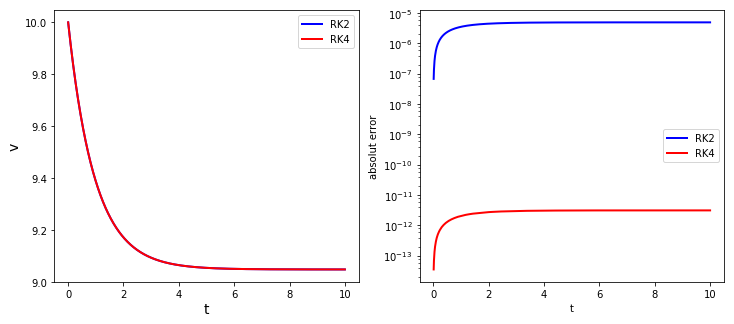

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
%**************************************************************************
%*     Problem 5.1                                                        *
%*     filename: problem05_1.py                                           *
%*     Programed by Ryoichi Kawai for Computational Physics Course        *
%*     Revised on 02/09/2017.                                             *
%**************************************************************************
"""
import numpy as np
import matplotlib.pyplot as plt

# parameters

tau=1.0 # time is measured with tau as unit.
g0=0.1  # initial frictional constant
m=1.0   # mass

# Control parameters
tmax=10; N=1000; h=tmax/N

# set up arrays
t=np.linspace(0.,tmax,N+1)
v_rk2=np.zeros(N+1)
v_rk4=np.zeros(N+1)
err_rk2=np.zeros(N+1)
err_rk4=np.zeros(N+1)

# initial conditions
v_rk2[0]=10.0
v_rk4[0]=10.0

# 2nd-order Runge-Kutta method
for n in range(0,N):
    k1 = -g0*np.exp(-t[n])*v_rk2[n]
    v_mid = v_rk2[n]+k1*h/2.0
    k2 = -g0*np.exp(-(t[n]+h/2.0))*v_mid
    v_rk2[n+1]=v_rk2[n]+k2*h
    err_rk2[n+1]=v_rk2[n+1]-v_rk2[0]*np.exp(-g0/m*(1.0-np.exp(-t[n+1])))


# 4th-order Runge-Kutta method
for n in range(0,N):
    k1 = -g0*np.exp(-t[n])*v_rk4[n]
    v_mid = v_rk4[n]+k1*h/2.0
    k2 = -g0*np.exp(-(t[n]+h/2.0))*v_mid
    v_mid = v_rk4[n]+k2*h/2.0
    k3 = -g0*np.exp(-(t[n]+h/2.0))*v_mid
    v_end = v_rk4[n]+k3*h
    k4 = -g0*np.exp(-t[n+1])*v_end;
    v_rk4[n+1]=v_rk4[n]+ (k1+2*(k2+k3)+k4)*h/6.0
    err_rk4[n+1]=v_rk4[n+1]-v_rk4[0]*np.exp(-g0/m*(1.0-np.exp(-t[n+1])))


# plot the velocity
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(t,v_rk2,'-b',linewidth=2,label='RK2')
plt.plot(t,v_rk4,'-r',linewidth=2,label='RK4')
plt.xlabel('t',fontsize=14)
plt.ylabel('v',fontsize=14)
plt.legend(loc=1)

# plot the absolute errors
plt.subplot(1,2,2)
plt.semilogy(t,abs(err_rk2),'-b',linewidth=2,label='RK2')
plt.semilogy(t,abs(err_rk4),'-r',linewidth=2,label='RK4')
plt.xlabel('t');
plt.ylabel('absolut error')
plt.legend(loc=5)
plt.show()